In [1]:
#~/Programming/Robotics/FRCPythonProcessing
# BIG TODO: Cleanup a lot of this code.
# BIG TODO: Think about refacotring the dict_data dictionary into a class, and compress all the methods into it.

# PSA:
# This file was Darwin's original shot at tring to graph, it became an exersize in dictionary/array/numpy 
# manapulation, and all of these steps were later deprecated by Pandas.

import matplotlib 
# TODO: Port this to pandas
import numpy as np
import matplotlib.pyplot as plt
# Imports for data processing
np.set_printoptions(threshold=np.nan)



In [47]:


# Cube constant defines
# TODO: use name to find this out
CUBESCALE = 19
CUBEEXC = 18
CUBEOPPSWITCH = 16
CUBEALLYSWITCH = 15


In [66]:
def read_datafile(file_name):
    # the skiprows keyword is for heading, but I don't know if trailing lines
    # can be specifie
    data = np.genfromtxt(fname=file_name,
                         usecols=np.arange(1,36), #Temp to protect from some cols having 37 values. 
                                                  #We also don't need 1st col (Or 6th)
                         delimiter=",",
                         skip_header=1,
                         missing_values={0:'',1:'TRUE',0:'FALSE'}, # set all values of empty to be 0,
                                                                   # values of true to be 1, and value of false to be 0
                         )
    
    np.nan_to_num(data,False) # Nan is 0, despite the defination of Nan
    
    return data

VernonGP = read_datafile('Mt_Vernon_Scouting.csv')

print(VernonGP)
#Don't know how to handle if that data is not *exactly* where it needs to be
#In the form of a ndarray array

[[2.000e+00 3.600e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [8.000e+00 3.600e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.000e+00 7.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.500e+01 3.600e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 5.000e+00 

Few important notes:
    - To retreve any given data entry
        - In the form of [entry][datapoint]
        - Where entry is the horizontal row, datapoint is the distance down that given 'entry'
    - Strings still throw errors, strings turn into NaN, which is ATM fine, because each team number is just an int
    - The current data range is (445, 35)
    - [data].shape = tuple of dimensions ^^
    - Temp Data assignments untill a more standard system is put into place
        - 18 = # cubes into exchange
        - 16 = # cubes in opponent switch
        - 15 = # cubes on our switch
        - 19 = # cubes in scale


In [73]:

# TODO: Prevent overflow (This can overflow, right now I am cheating by emptying the list before the method)
def sum_team_data(data):
    cells2read = [18,16,15,19] #TODO: Make this an argument to the method

    teamData = {}
    # Perform this task for every entry
    #for numentry in range(0,data.shape[0]):
    # TODO: First row of every team is not read properly
    for entry in data:
        team = str(entry[1])
        if team in teamData:
            for cell in cells2read:
                if cell == CUBESCALE:
                    teamData[team]['cubescale'] += entry[cell]
                elif cell == CUBEEXC:
                    teamData[team]['cubeexc'] += entry[cell]
                elif cell == CUBEOPPSWITCH:
                    teamData[team]['cubeoppswitch'] += entry[cell]
                elif cell == CUBEALLYSWITCH:
                    teamData[team]['cubeallyswitch'] += entry[cell]
        else:
            TEAMDATA[team] = {'cubescale':0, 'cubeexc':0, 'cubeoppswitch':0, 'cubeallyswitch':0}
            # Create a standard entry in the 2D dictonary
    
    return teamData
                
            
    

sum_team_data(VernonGP)

{}

    Current plan to convert data into a table:
        - cells2read = [18,16,15,19]
        - For entry in data:
            if str(team#) in dict:
                for cell in cells2read:
                    if cell == 18:
                        dict['strteam#']['cubeexc'] += entry[cell]
                    elif cell == 16:
                        dict['strteam#']['cubeoppswitch'] += entry[cell]
                    elif cell == 15:
                        dict['strteam#']['cubeallyswitch'] += entry[cell]
                    elif cell == 19:
                        dict['strteam#']['cubescale'] += entry[cell]
                    
            

In [57]:
# Creates a bar graph from a dictionary data
# sorted(foo, key=foo.get)

# Main issue with the so
WIDTH = 0.35

team2data = {}

# Dict_data is the large dictionary with team:{stat, stat, stat, stat}
def bar_data(dict_data, data):
    x = []
    height = []
    tick_label = []
    
    team2data = {}
    # team#:data point
    
    for key in dict_data:
        # Creates {team:data}
        team2data[key] = dict_data[key][data]

    copy = team2data
    team2data = {}
    
    for key in sorted(copy, key=copy.get,reverse=True):

        team2data[key] = copy[key]

        
    for key in team2data:
        height.append(team2data[key])
        
    ind = np.arange(len(team2data))
    
    
    return (plt.bar(ind, height, WIDTH), team2data)
    


In [58]:
# Sorting the dict data
# Currently sorts by size largest -> smallest

'''
def sort_data(dict_data):
    out = {}
    for _ in dict_data:
        for key in sorted(dict_data[_]['cubescale'],key=dict_data.get):
            out[key] = dict_data[key]

    return out


'''

"\ndef sort_data(dict_data):\n    out = {}\n    for _ in dict_data:\n        for key in sorted(dict_data[_]['cubescale'],key=dict_data.get):\n            out[key] = dict_data[key]\n\n    return out\n\n\n"

In [59]:
# TODO: Make more universal
# Creates a list of all team #'s
# Accept a dictionary in the form of team#:data
# Assuming one data point
def list_teams(dict_data):
    keys = []
    
    for key in dict_data:
        key = key[:-2] # Clip the .0 from all the team numbers for A S T H E T I C
        keys.append(key)
    
    # Returns a list
    # print("\nCurrent teams being graphed:\n\n",keys)
    return keys


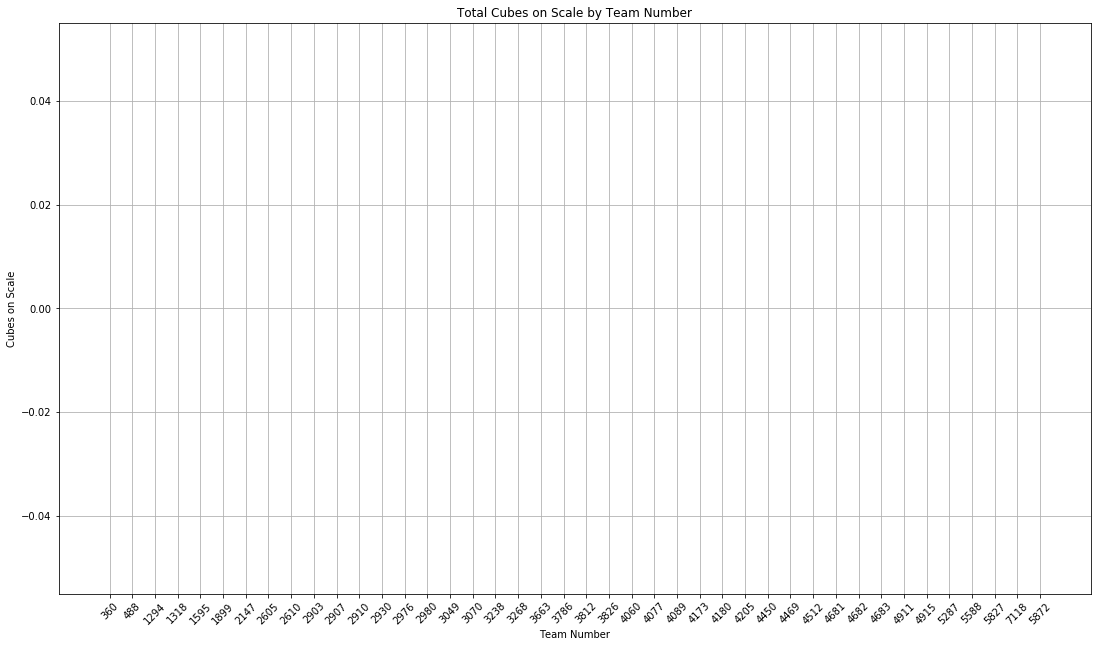

In [68]:
# Set figure sie
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

# Create bar plot
p1,team2data = bar_data(TEAMDATA, 'cubescale')

# Labels
plt.ylabel('Cubes on Scale')
plt.xlabel('Team Number')
plt.title('Total Cubes on Scale by Team Number')

# Config for X-Ticks

x_tick = list_teams(team2data)
plt.xticks(np.arange(len(x_tick)), x_tick)
plt.xticks(rotation=45)

# Grid
plt.grid(True)

# Readable .png
plt.savefig('SampleGraph.png', dpi=400)
